## KNN 算法介绍

1. 思考极度简单
2. 应用数学只是少
3. 效果好
4. 可以解释机器学习算法使用过程中的很多细节问题
5. 更完整的刻画机器学习应用的流程
6. kNN 算法可以被认为是没有模型的算法
7. 也可以认为训练集本身就是模型本身

### 缺点：

1. 效率低下，m个样本，n个特征,计算每一个新数据都需要O(n*m)
2. 高度数据相关性
3. 预测结果不具有可解释性
4. 维数灾难，随着维数增加，看着相近的两个点距离越来越大

 ### 对一个算法的掌握无非知其然，也知其所以然
1. 知道如何调用，其使用方法
2. 知道原理，其底层实现过程

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
train_data = np.random.normal(scale=1,size=(10,2))
train_label = np.zeros(10,dtype=np.int32)
train_label[5:] = 1
test_data = np.array([0.4684,1.2542])
test_data = np.reshape(test_data,(-1,2))
test_data

array([[0.4684, 1.2542]])

In [3]:
train_data

array([[-0.25725126,  1.34752709],
       [-0.32655629, -0.10688602],
       [-0.42263456,  0.82483864],
       [-1.10812943,  0.12445211],
       [ 0.2557011 , -0.37283807],
       [ 1.06401452,  2.12465723],
       [-1.13952693,  0.85715184],
       [ 0.47794443,  2.51193305],
       [-0.40683679, -1.22528252],
       [-0.37211838,  0.56309269]])

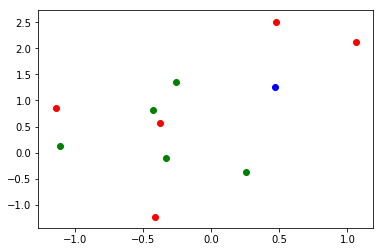

In [4]:
plt.scatter(train_data[:5,0],train_data[:5,1],color='g')
plt.scatter(train_data[5:,0],train_data[5:,1],color='r')
plt.scatter(test_data[0,0],test_data[0,1],color='b')
plt.show()

In [5]:
test_data = np.reshape(test_data,[1,1,2])
distances = np.subtract(test_data,train_data)
distances = np.sqrt(np.power(distances[:,:,0],2)+np.power(distances[:,:,1],2))
distances.shape
distances

array([[0.73162812, 1.57623305, 0.98908734, 1.93952967, 1.64088199,
        1.05472861, 1.65622349, 1.25776926, 2.62942446, 1.0881638 ]])

In [6]:
index = np.argsort(distances.reshape(10))[:3]
# for i in index:
#     print(train_label[i])
print(index)
pred = [train_label[i] for i in index]
from collections import Counter
cls = Counter(pred).most_common(1)
print(cls[0][0])

[0 2 5]
0


### 函数封装

In [7]:
from collections import Counter

import numpy as np


def KNN_classify(k,trainX,trainY,testX):
    assert 1<=k<=trainX.shape[0],"k must be a valid"
    distances = [np.sqrt(np.sum(np.power((train_x-testX),2))) for train_x in trainX]
    index = np.argsort(distances)[:k]
    pred = [trainY[i] for i in index]
    cls = Counter(pred).most_common(1)
    return cls[0][0]

In [8]:
KNN_classify(3,train_data,tra in_label,test_data)

0

### 使用scikit中的KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(train_data,train_label)
Knn.predict(test_data)

array([0])

### 自己实现knn

In [22]:
class KNeighborsClassifier:
    def __init__(self,k):
        """初始化分类器"""
        assert k>=1,"k must be valid"
        self._k = k
        self._trainX = None
        self._trainY = None
        
    def __repr__(self):
        return "Knn=%s"%(self._k)
        
    def fit(self,trainX,trainY):
        """训练数据集"""
        self._trainX = trainX
        self._trainY = trainY
        return self
    
    def _predict(self,x):
        """给单个预测数据x,返回预测结果"""
        distances = [np.sqrt(np.sum(np.power((train_x-x),2))) for train_x in self._trainX]
        index = np.argsort(distances)[:self._k]
        pred = [self._trainY[i] for i in index]
        cls = Counter(pred).most_common(1)
        return cls[0][0]
    
    def predict(self,testX):
        """给定待测数据集，返回结果向量"""
        assert self._trainX is not None and self._trainY is not None,"must fit before predict"
        predictY = [self._predict(i) for i in testX]
        return np.array(predictY)

In [23]:
Knn = KNeighborsClassifier(3)
Knn.fit(train_data,train_label)
print(Knn.predict(test_data))

[0]


### train_test_split

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [28]:
# 方法一
np.random.seed(5)
x = np.random.permutation(x)
np.random.seed(5)
y = np.random.permutation(y)

In [52]:
# 方法二(更优，推荐)
index = np.random.permutation(150) 
train = index[:120]
test = index[120:]
# print(len(index))
# print(type(x))
x_train = x[train]
x_test = x[test]
y_train = y[train]
y_test = y[test]

In [91]:
def train_test_split(x,y,test_ratio=0.2,seed=None):
    assert x.shape[0]==y.shape[0],"the size of x must be equal to the size of y"
    if seed:
        np.random.seed(seed)
    length = len(x)   
    index = np.random.permutation(length)
    test_size = int(length*test_ratio)
    test_index = index[:test_size]
    train_index = index[test_size:]
    
    trainX = x[train_index]
    trainY = y[train_index]
    testX = x[test_index]
    testY = y[test_index]
    return trainX,testX,trainY,testY

In [62]:
trainX,trainY,testX,testY = train_test_split(x,y,test_ratio=0.2)

In [64]:
trainX.shape

(120, 4)

### 分类准确度

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
x = digits.data
y = digits.target

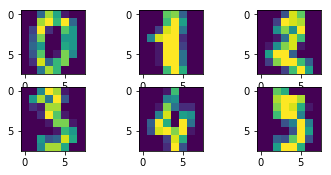

In [75]:
showImages = np.reshape(x,(-1,8,8))[:6]
plt.subplot(3,3,1)
plt.imshow(showImages[0])
plt.subplot(3,3,2)
plt.imshow(showImages[1])
plt.subplot(3,3,3)
plt.imshow(showImages[2])
plt.subplot(3,3,4)
plt.imshow(showImages[3])
plt.subplot(3,3,5)
plt.imshow(showImages[4])
plt.subplot(3,3,6)
plt.imshow(showImages[5])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2)
knn = KNeighborsClassifier(5)
knn.fit(trainX,trainY)
test_y = knn.predict(testX)
# print(test_y)
# print(testY)
print(accuracy_score(test_y,testY))
# knn.score(test_y,testY)
print(np.sum(test_y==testY)/len(testY))

0.9888888888888889
0.9888888888888889


## 超参数和模型参数

超参数：在算法运行前需要决定的参数<br>
模型参数：算法过程中学习的参数<hr>

Knn算法没有模型参数<br>
Knn中的k是典型的超参数

### 寻找好的超参数：

1. 领域知识
2. 经验数值
3. 实验搜索

### 寻找最好的K

In [123]:
best_score = 0.0
best_k = -1
for method in ["distance","uniform"]:
    for k in range(1,11):
        trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2,random_state=66)
        knn = KNeighborsClassifier(k,weights=method)
        knn.fit(trainX,trainY)
        test_y = knn.predict(testX)
        score = np.sum(test_y==testY)/len(testY)
#         print("best_score=",best_score)
    #     print(score)
        if best_score<score:
            best_score = score
            best_k = k
            
    print("method=",method)        
    print("best_score=",best_score)
    print("best_k=",best_k)      

method= distance
best_score= 0.9666666666666667
best_k= 3
method= uniform
best_score= 0.9666666666666667
best_k= 3


### 明可夫斯基距离

![明可夫斯基距离](http://p9tybni1b.bkt.clouddn.com/%E6%98%8E%E5%8F%AF%E5%A4%AB%E6%96%AF%E5%9F%BA%E8%B7%9D%E7%A6%BB.png)

当p的值为1时，则是曼哈顿距离，当p为2时则是欧拉距离

### 搜索明可夫斯基距离相应的p

In [19]:
best_score = 0.0
best_k = -1
for p in range(1,6):
    for k in range(1,11):
        trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2)
        knn = KNeighborsClassifier(k,weights="distance",p=p)
        knn.fit(trainX,trainY)
        test_y = knn.predict(testX)
        score = np.sum(test_y==testY)/len(testY)
    #     print(score)
        if best_score<score:
            best_score = score
            best_k = k
    print("p=",p)        
    print("best_score=",best_score)
    print("best_k=",best_k)
    print("============"*10)

p= 1
best_score= 0.9972222222222222
best_k= 8
p= 2
best_score= 0.9972222222222222
best_k= 8
p= 3
best_score= 0.9972222222222222
best_k= 8
p= 4
best_score= 0.9972222222222222
best_k= 8
p= 5
best_score= 0.9972222222222222
best_k= 8


### 网格搜索Grid Search 交叉验证

In [23]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

In [24]:
knn_clf = KNeighborsClassifier()

In [34]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1)

In [35]:
from sklearn import datasets

digits = datasets.load_digits()
x = digits.data
y = digits.target
trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
grid_search.best_score_

0.9909533750869868

In [29]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [32]:
knn_clf = grid_search.best_estimator_
knn_clf.score(testX,testY)

0.9777777777777777

## 数据归一化

将所有的数据映射到同一尺度中<br>


### 最值归一化：把所有数据映射到0-1之间，适用于有明显分布边界的情况

In [58]:
import numpy as np

x = np.random.randint(0,100,size=100)
s = np.divide((x-np.min(x)),np.subtract(np.max(x),np.min(x)))
s

array([0.21428571, 0.2244898 , 0.46938776, 0.17346939, 0.30612245,
       0.41836735, 0.98979592, 0.53061224, 0.30612245, 0.62244898,
       0.82653061, 0.67346939, 0.1122449 , 0.05102041, 0.2244898 ,
       0.16326531, 0.29591837, 0.10204082, 0.05102041, 0.70408163,
       0.64285714, 0.44897959, 0.23469388, 0.90816327, 0.68367347,
       0.90816327, 0.47959184, 0.43877551, 0.01020408, 0.53061224,
       0.33673469, 0.96938776, 0.53061224, 0.21428571, 0.31632653,
       0.94897959, 0.18367347, 0.36734694, 0.15306122, 0.17346939,
       0.6122449 , 0.17346939, 0.44897959, 0.09183673, 0.59183673,
       1.        , 0.96938776, 0.65306122, 0.40816327, 0.37755102,
       0.73469388, 0.81632653, 0.81632653, 0.54081633, 0.64285714,
       0.13265306, 0.56122449, 0.6122449 , 0.25510204, 0.5       ,
       0.83673469, 0.53061224, 0.17346939, 0.89795918, 0.07142857,
       0.35714286, 0.59183673, 0.84693878, 0.58163265, 0.74489796,
       0.10204082, 0.97959184, 0.09183673, 0.09183673, 0.47959

### 均值标准化：把所有数据归一到均值为0方差为1的分布中，适用于数据没有明显分布边界，可能存在极端数据值

In [1]:
import numpy as np

x = np.random.randint(0,100,size=100)
s = np.divide(np.subtract(x,np.mean(x)),np.std(x))
print(s)
print("标准差",np.std(s))
print("均值为",np.mean(s))

[-1.72973393  0.55763212 -1.41782038  0.86954567 -0.72467915  0.10709032
  0.00311914  1.38940158 -1.00193564  0.10709032  0.80023154  1.70131514
 -1.24453507 -1.27919213  1.32008746  0.0377762   1.35474452  0.31503269
 -1.0365927  -0.13550911 -0.13550911 -1.00193564  1.38940158  1.49337277
  0.2110615   1.49337277 -1.52179156 -0.4127656  -0.93262152 -0.65536503
 -1.38316331 -0.10085205 -1.4871345   1.38940158  1.14680216  0.69626036
 -1.0365927   0.97351685  0.73091742 -1.27919213  0.00311914  0.31503269
  1.07748803 -1.24453507 -0.06619499  1.32008746 -1.20987801  0.17640444
 -0.4127656   0.52297505 -0.10085205  1.42405865 -1.34850625  0.93885979
  0.52297505  1.49337277  0.59228918  0.00311914 -1.59110568 -1.69507686
  0.00311914  0.86954567 -1.00193564 -1.69507686 -0.72467915 -0.03153793
 -0.75933621 -1.20987801  1.49337277 -0.44742266 -1.55644862  0.0377762
 -0.89796446  0.6616033   0.45366093 -0.69002209 -1.0365927  -0.93262152
 -1.24453507  1.00817391  1.52802983  0.34968975  1.

### 对测试数据如何归一化

![测试数据归一化](http://p9tybni1b.bkt.clouddn.com/test%E5%BD%92%E4%B8%80%E5%8C%96.png)

In [99]:
# 导入数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_iris()
x = digits.data
y = digits.target
trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.2)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

def predict(trainX,testX,trainY,testY):
    Knn = KNeighborsClassifier(n_neighbors=3)
    Knn.fit(trainX,trainY)
    predict = Knn.predict(testX)
#     acc = Knn.score(predict.reshape(-1,1),testY.reshape(-1,1)) 报错
    acc = np.sum(predict==testY)/len(predict)
    print(acc)


predict(trainX,testX,trainY,testY)
# 归一化
standardScaler = StandardScaler()
standardScaler.fit(trainX)
trainX = standardScaler.transform(trainX)
testX = standardScaler.transform(testX)
predict(trainX,testX,trainY,testY)

0.9
0.9


### 自己实现StandardScaler

In [116]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.var_ = None
        
    def fit(self,X):
        """根据训练集获得训练集均值和方差"""
        assert X.ndim == 2, "The dimension of X must be 2"
        self.mean_ = np.mean(X,axis=0)
        self.var_ = np.std(X,axis=0)
        return self
    
    def transform(self,X):
        """进行均值方差归一化处理"""
        assert X.ndim == 2, "The dimension of X must be 2"
        assert self.mean_ is not None and self.var_ is not None,"must fit before transform"
        assert X.shape[1]==len(self.mean_),"must be equal "
        reX = np.empty(X.shape,dtype=np.float32)
        for col in range(X.shape[1]):
            reX[:,col] = (X[:,col]-self.mean_[col])/self.var_[col]
        return reX

In [117]:
standardScaler = StandardScaler()
standardScaler.fit(trainX)
standardScaler.transform(trainX)

array([[ 0.45217317, -0.7486157 ,  0.57360554,  0.73643214],
       [ 0.07881918, -1.8800248 ,  0.039559  , -0.35795617],
       [-1.6634995 ,  0.835357  , -1.503242  , -1.3155459 ],
       [ 0.45217317, -1.2011793 ,  0.63294405,  0.87323064],
       [ 0.70107585, -0.06977022,  1.1076521 ,  1.2836263 ],
       [ 0.70107585, -0.52233386,  0.39559   ,  0.3260365 ],
       [-0.1700835 , -0.7486157 ,  0.69228256,  0.87323064],
       [-1.0412428 ,  1.7404842 , -1.4439036 , -1.3155459 ],
       [-0.1700835 , -0.9748975 ,  0.039559  , -0.08435909],
       [ 0.8255272 , -0.06977022,  0.27691302,  0.18923797],
       [-1.2901455 , -1.4274611 , -0.3758105 , -0.35795617],
       [ 0.5766245 ,  0.3827934 ,  0.8109595 ,  1.4204248 ],
       [ 0.45217317, -0.52233386,  0.69228256,  0.3260365 ],
       [ 0.94997853,  0.15651159,  0.98897505,  1.5572233 ],
       [ 0.94997853,  0.6090752 ,  1.0483135 ,  1.6940218 ],
       [-1.4145968 , -0.06977022, -1.503242  , -1.3155459 ],
       [ 2.1944919 , -0.